# A notebook to work through examples and explain the ```Manifold``` class.
- Click here for the complete script of the class: [manifold.py](https://github.com/hankbesser/brownian-manifold/blob/master/brownian_manifold/manifold.py) 

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Go to the main package directory (```brownian_manifold```) using the magic command: 
####  ```%cd  ../brownian-manifold/brownian_manifold```
- for example with an UNIX machines (this notebook originally ran on an Ubuntu operating system):

In [2]:
%cd ~/Documents/brownian-manifold/brownian_manifold

/home/hbesser/Documents/brownian-manifold/brownian_manifold


to make sure we are in the brownian-manifold directory:

In [3]:
%pwd

'/home/hbesser/Documents/brownian-manifold/brownian_manifold'

#### Now we can import ```Manifold```

In [4]:
from manifold import Manifold

## Create a Manifold object

#### Lets first look at ```Manifold``` documentation with the inline help (i.e. type ```Manifold?``` in the code cell)
- Note: the ```Manifold?``` command is a great way to read general ```Manifold``` functionality used throughout this notebook

A window will pop-up with all the documentation of the Class:

In [29]:
Manifold?

## Part 1:  
### basics of work with a 2-sphere and finite cylinder manifolds

Invoke ```Manifold``` and instantiate ```sphere_manifold``` and ```cylinder_manifold``` (or whatever you would like to name the specific instances of ```Manifold```)

In [51]:
# specify the inital paramters for 2-sphere
sphere_manifold= Manifold(manifold='sphere', 
                          radius_sphere=1, 
                          final_time=20, 
                          n_steps=150000)

In [52]:
# specify the inital paramters for finite cylinder
cylinder_manifold = Manifold(manifold='cylinder', 
                          radius_cylinder=1,
                          height_cylinder=10, 
                          final_time=20, 
                          n_steps=150000)

### 1A. Basic surface 2-sphere plots

####  Ok now the have created a  ```sphere_manifold``` (or whatever you named it) instance of ```Manifold```. Let's inspect the object.
- ```type sphere_manifold.``` then the ```tab``` key on your keyboard to see the attributes and methods

- Lets just print the inital attributes that we assigned to the instance:

In [18]:
print(sphere_manifold.manifold)
print(sphere_manifold.radius_sphere)
print(sphere_manifold.final_time)
print(sphere_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(sphere_manifold.step_size)

sphere
1
20.0
150000
0.00013333333333333334


#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 
-note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [23]:
sphere_manifold.get_sphere?

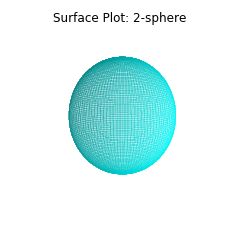

In [24]:
sphere_surface_data = sphere_manifold.get_sphere(plot=True)

#### Plot 2: plot surface of sphere with the ```plot_sphere``` method with the ability to change default plotting options:

Requires the variable storing the ```get_sphere``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```sphere_surface_data``` (but could be named anything). 

Some changeable ```matplotlib``` option include:

- ```show_axes```: default is False.
- ```has_title```: default is True.
- ```antialiased```: default is False. False shows lines on the sphere and when set to True the lines fade away. 
- ```color```: default is cyan
- ```alpha```: transparency of the surface (0.0-transparent to 1.0-opaque) default is 0.2  

In [28]:
sphere_manifold.plot_sphere?

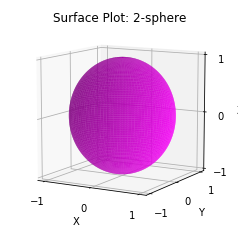

In [32]:
sphere_manifold.plot_sphere(sphere_surface_data, 
                            color='magenta', 
                            alpha=0.7, 
                            antialiased=True, 
                            show_axes=True)

### 1B. Basic surface finite cylinder plots
#### the  ```cylinder_manifold``` (or whatever you named it) instance works just like the ```sphere_manifold``` (or whatever you named it) instance

- Lets just print the inital attributes that we assigned to the instance:

In [37]:
print(cylinder_manifold.manifold)
print(cylinder_manifold.radius_cylinder)
print(cylinder_manifold.height_cylinder)
print(cylinder_manifold.final_time)
print(cylinder_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(cylinder_manifold.step_size)

cylinder
1
10
20.0
150000
0.00013333333333333334


#### Plot 3: plot surface of finite cylinder with the  ```get_cylinder``` method using default options: 
-again note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [46]:
cylinder_manifold.get_cylinder?

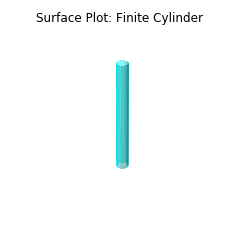

In [90]:
cylinder_surface_data = cylinder_manifold.get_cylinder(plot=True)

#### Plot 4: plot surface of sphere with the ```plot_cylinder``` method with the ability to change default plotting options:

Requires the variable storing the ```get_cylinder``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```cylinder_surface_data``` (but could be named anything).

- Look at plot 3 (calling the ```plot_sphere``` method) for the options that can be changed. 
- For plotting the surface of the finite cylinder ```show_axes=True``` it is visually informative to compare the height and radius of the finite cylinder.  

In [48]:
cylinder_manifold.plot_cylinder?

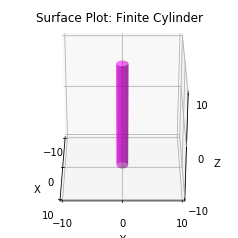

In [92]:
cylinder_manifold.plot_cylinder(cylinder_surface_data, 
                                color='magenta', 
                                alpha=0.7, 
                                antialiased=True, 
                                show_axes=True)

## Part 2 (The Interesting Stuff): 

####  Simulating simulating and visualizing the trajectory of Brownian motion on 2-sphere and finite cylinder manifolds embedded in three-dimensional Euclidian space.

#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 

In [10]:
sphere_simdata = sphere_manifold.simulate_brownian_sphere()

In [11]:
data_sphere = pd.DataFrame({'Step Number': np.arange(1,sphere_manifold.n_steps+1),
                            'X' : sphere_simdata[:,0],
                            'Y' : sphere_simdata[:,1],
                            'Z' : sphere_simdata[:,2]})
df = pd.DataFrame(data_sphere)  

In [12]:
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "80%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df.tail(15).style.set_table_styles(styles)
          .set_caption("Sucess: Rotated back to the pole! (and tiny steps)"))
html

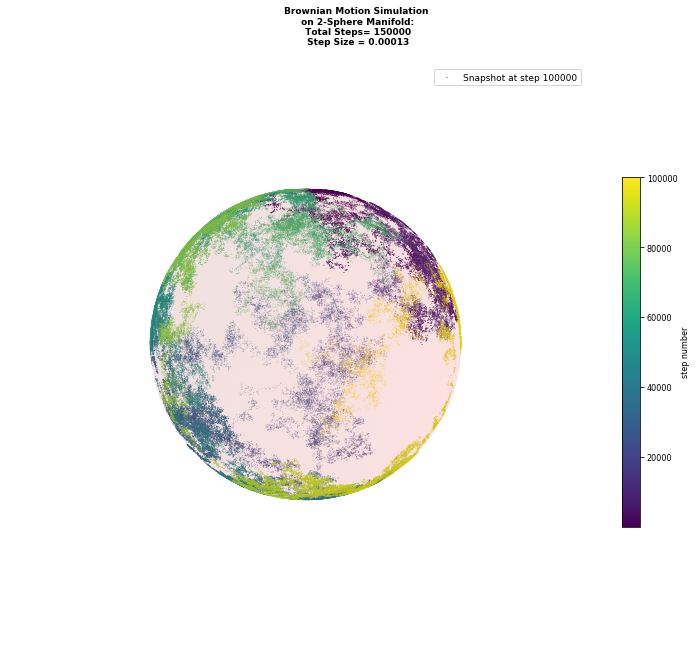

In [13]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[100000])

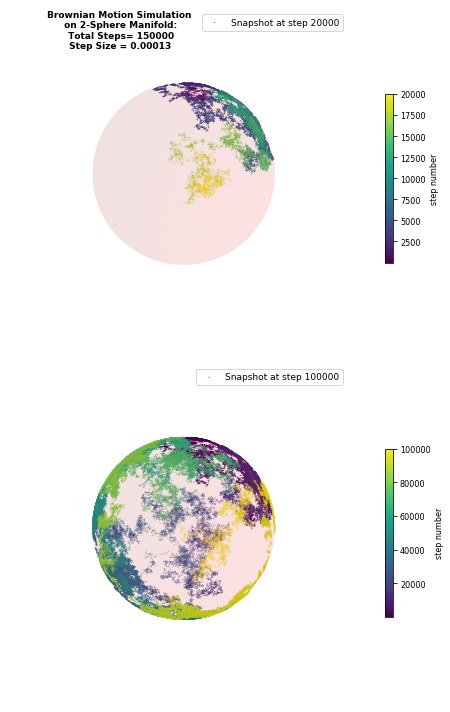

In [14]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[20000,100000])

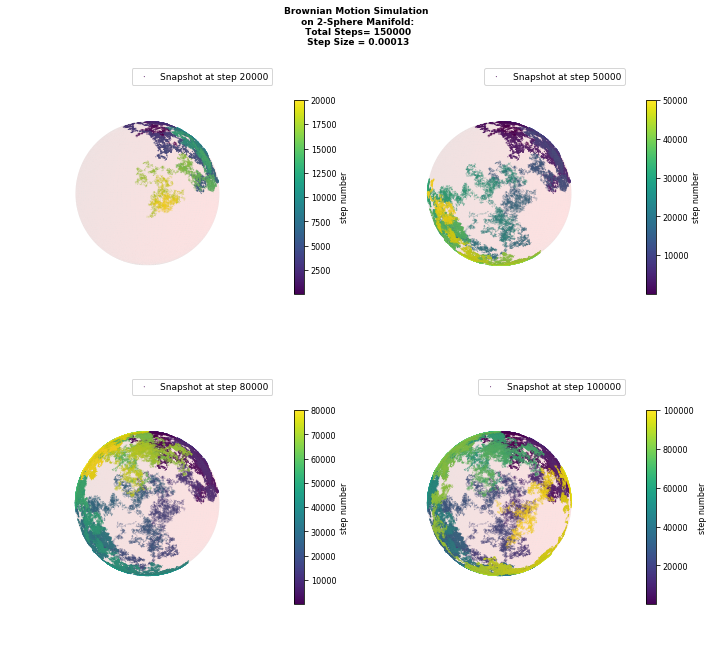

In [15]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[20000,50000,80000,100000])